In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt



# Loading data

In [30]:
raw_train_features = pd.read_csv('train_values.csv')
raw_train_labels = pd.read_csv('train_labels.csv')
raw_test_features = pd.read_csv('test_values.csv')
raw_test_features.shape

(86868, 39)

### EDA

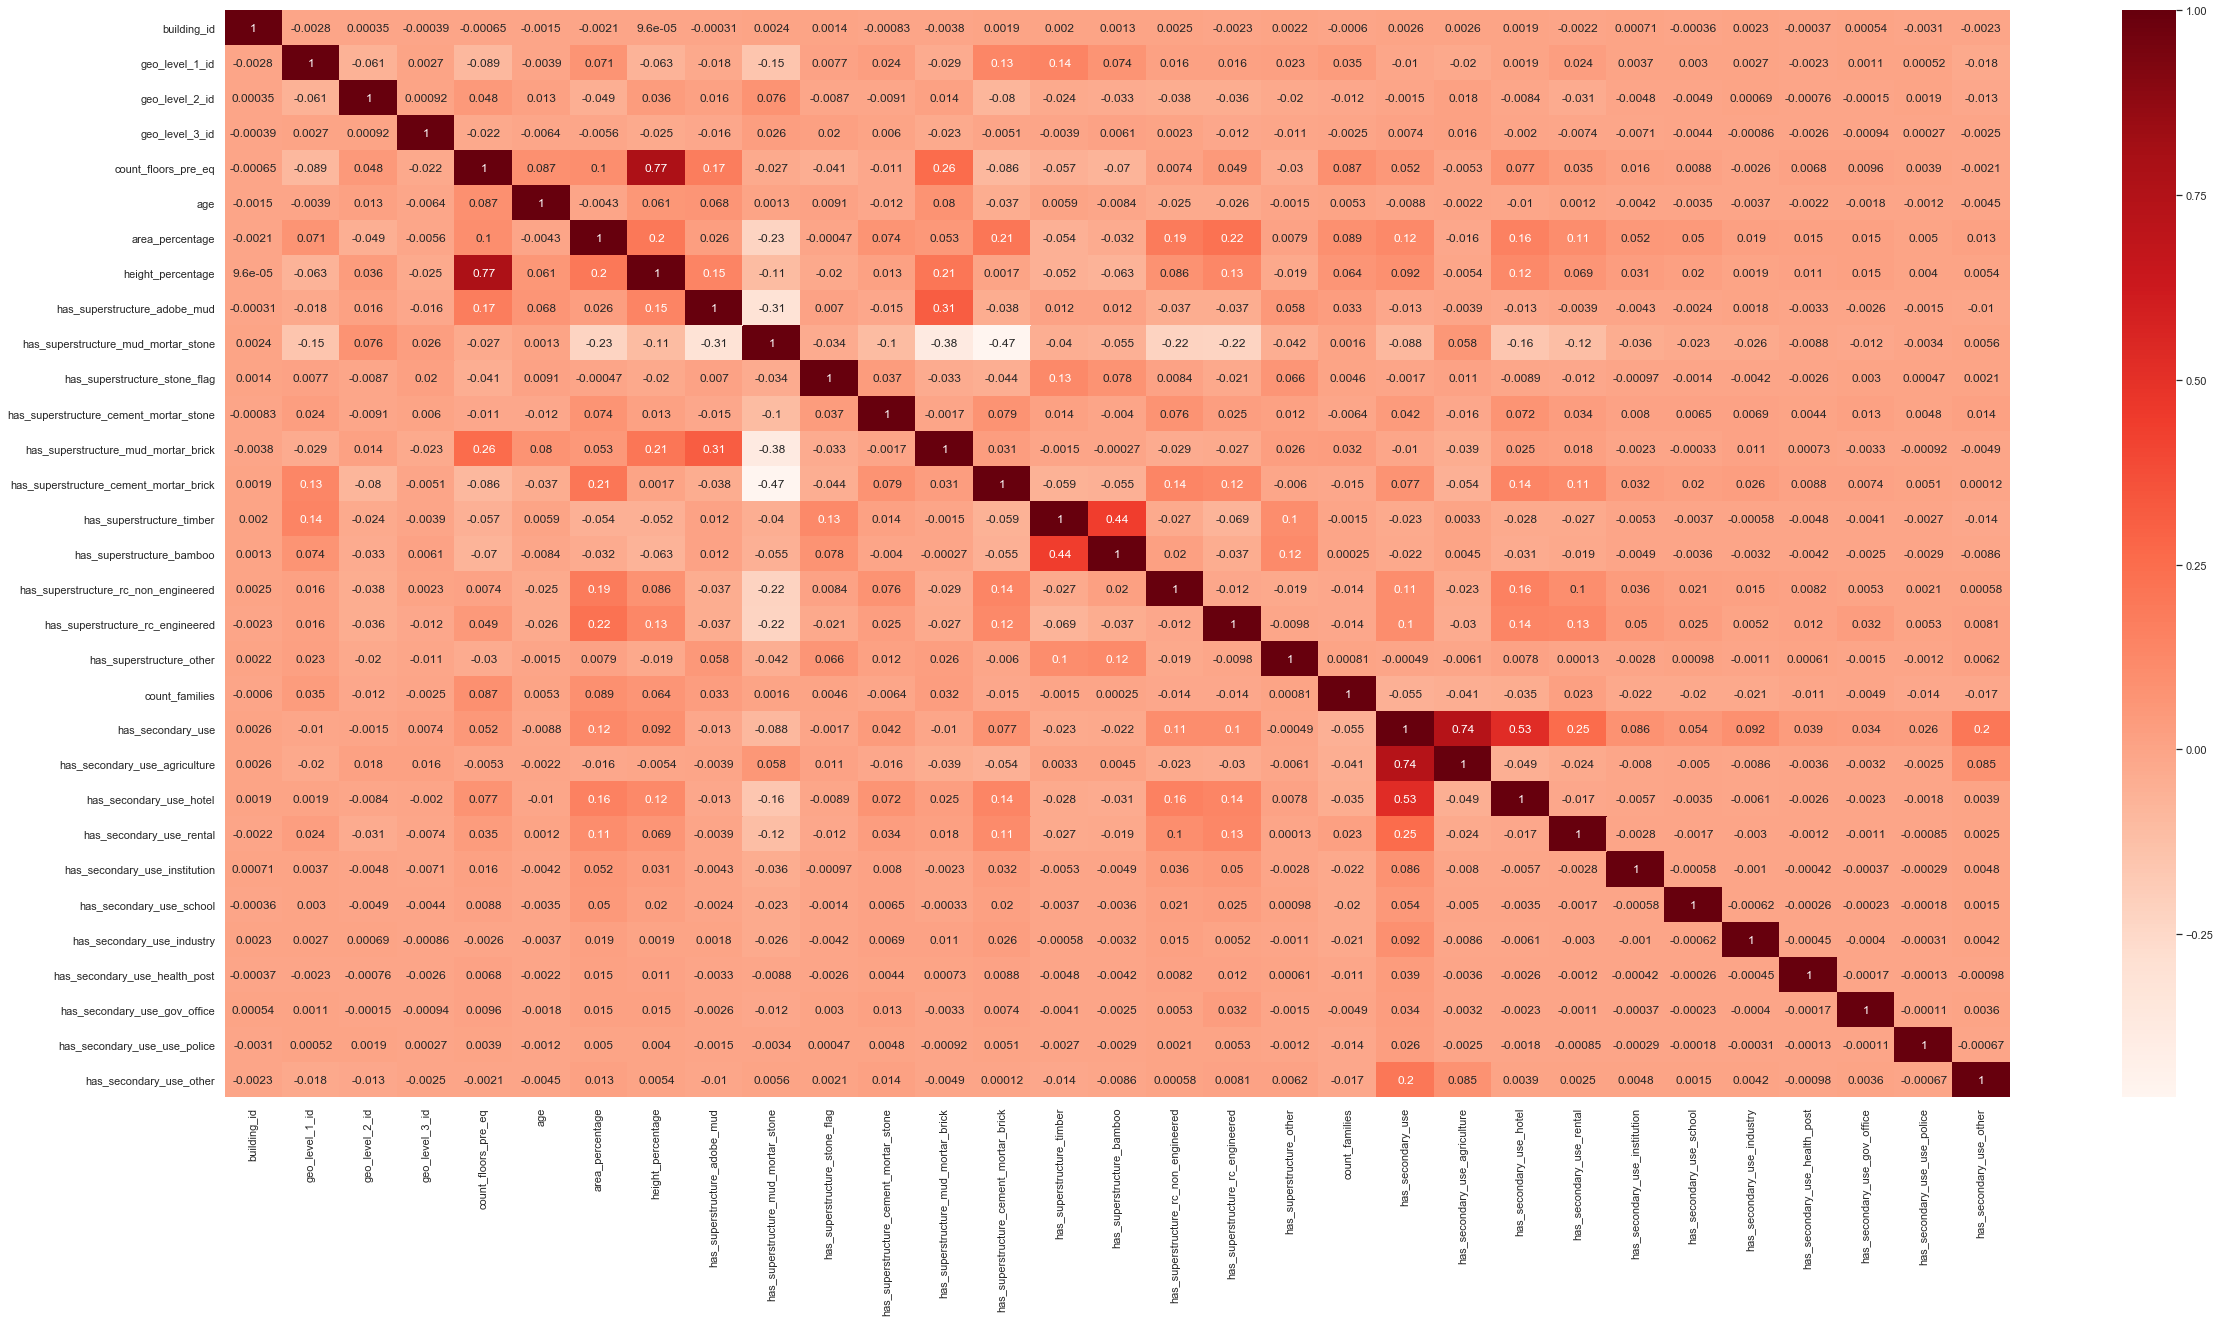

In [521]:
plt.figure(figsize=(40,20))
cor = raw_train_features.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

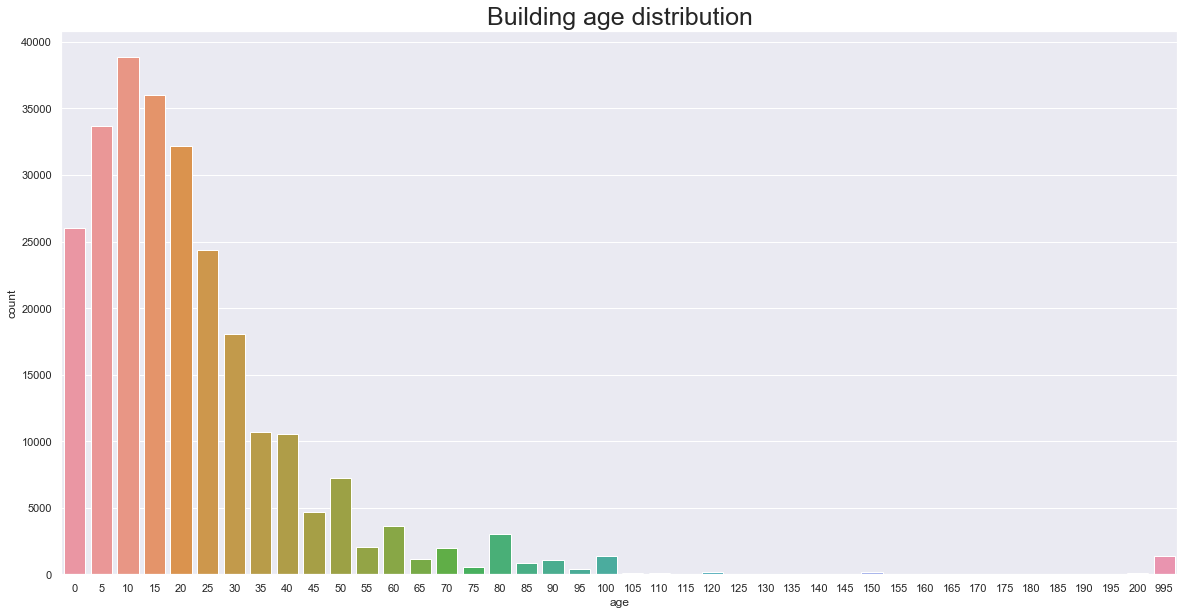

In [483]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(raw_train_features.age)
plt.title('Building age distribution', fontsize=25)
plt.show()

In [369]:
num_buildings = len(raw_train_features[raw_train_features.age > 100])
print('Number of buildings with more than 100 years:', num_rows, ', which represent ', weight_buildings, ' of the samples')
weight_buildings = len(raw_train_features[raw_train_features.age > 100]*100)/len(raw_train_features)

Number of buildings with more than 100 years: 2124 , which represent  0.008150390827356763  of the samples


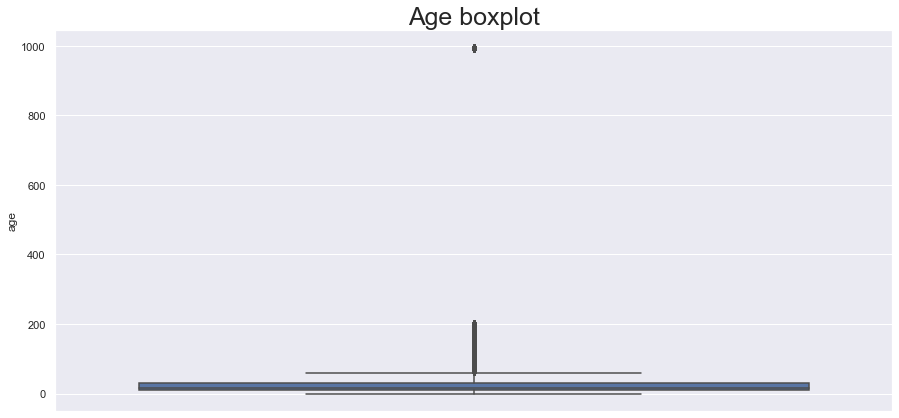

In [370]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
ax = sns.boxplot(y=raw_train_features.age)
plt.title('Age boxplot', fontsize=25)
plt.show()

In [371]:
raw_train_features.age.describe()

count    260601.000000
mean         26.535029
std          73.565937
min           0.000000
25%          10.000000
50%          15.000000
75%          30.000000
max         995.000000
Name: age, dtype: float64

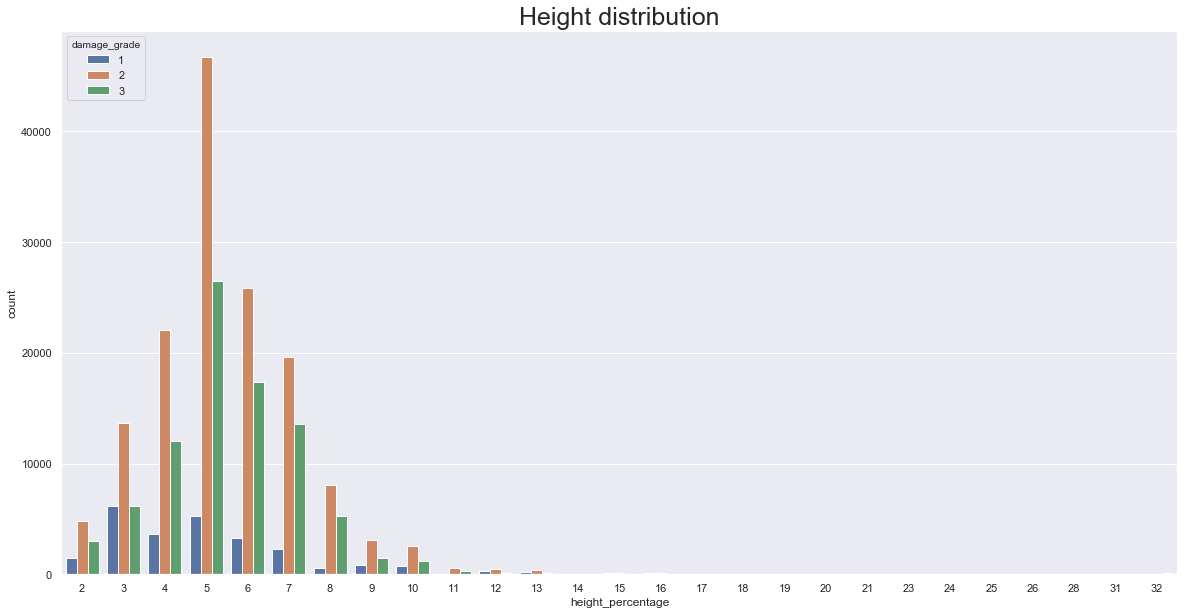

In [372]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(x = raw_train_features.height_percentage, hue = raw_train_labels.damage_grade)
plt.title('Height distribution', fontsize=25)
plt.show()


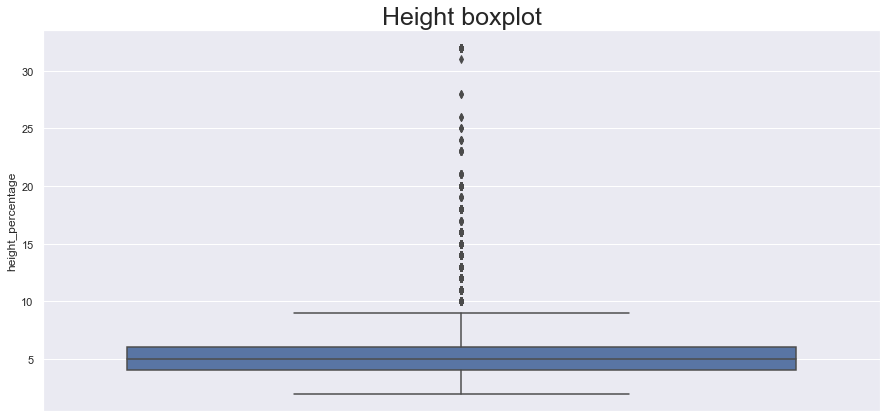

In [373]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
ax = sns.boxplot(y=raw_train_features.height_percentage)
plt.title('Height boxplot', fontsize=25)
plt.show()

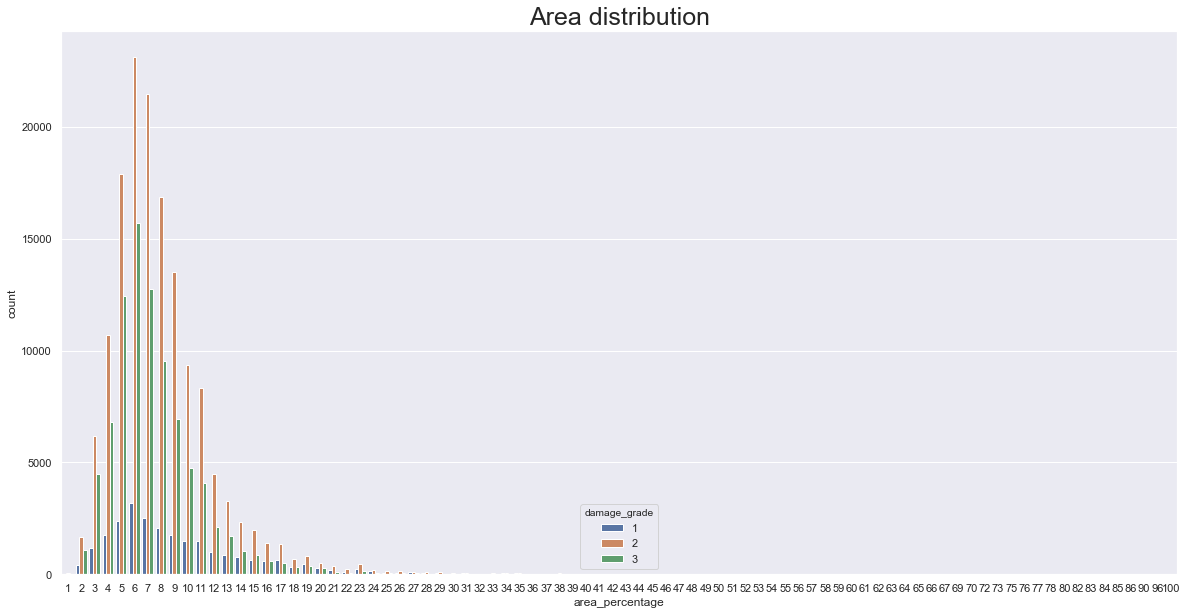

In [374]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.countplot(x = raw_train_features.area_percentage, hue = raw_train_labels.damage_grade)
plt.title('Area distribution', fontsize=25)
plt.show()

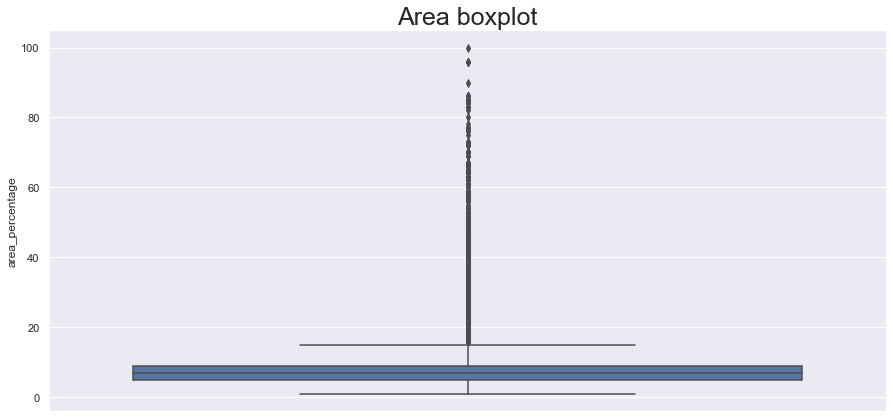

In [375]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
ax = sns.boxplot(y=raw_train_features.area_percentage)
plt.title('Area boxplot', fontsize=25)
plt.show()

#### Distribution of train labels

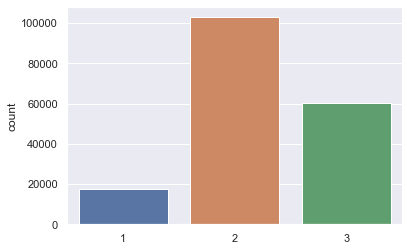

In [389]:
sns.set(style="darkgrid")
ax = sns.countplot(train_labels)

# Feature engineering

### Dealing with categorical variables

In [32]:
# One hot encoding of categorical variables

def hot_encode(df, lst):
    for i in lst:
        variable_df = pd.get_dummies(df[i], prefix = i)
        df = pd.concat([df, variable_df], axis=1)
        df = df.drop([i], axis=1)
    
    return df

# Train values
categorical_features = ['foundation_type', 'land_surface_condition', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']
extended_train_features = hot_encode(raw_train_features, categorical_features)

# Test values
extended_test_features = hot_encode(raw_test_features, categorical_features)
print(extended_test_features.shape)

(86868, 69)


### Age

In [33]:
# Drop buildings with more that 100 years from train features and labels

# Train values
building_index = extended_train_features[extended_train_features.age > 100].index
extended_train_labels = raw_train_labels.copy()
extended_train_labels.drop(building_index, inplace=True)
extended_train_features.drop(building_index, inplace=True)
print(len(extended_train_labels))
print(len(extended_train_features))


258477
258477


In [36]:
# Normalizing age data

from sklearn.preprocessing import MinMaxScaler

# Train values

scaler_age1 = MinMaxScaler()
train_age_scaled1 = scaler_age1.fit_transform(np.array(extended_train_features.iloc[:, 5]).reshape(-1,1))

print(train_age_scaled1.mean(axis=0))
print(train_age_scaled1.std(axis=0))

extended_train_features.age = train_age_scaled

# Test values

scaler_age2 = MinMaxScaler()
train_age_scaled2 = scaler_age2.fit_transform(np.array(extended_test_features.iloc[:, 5]).reshape(-1,1))

print(train_age_scaled2.mean(axis=0))
print(train_age_scaled2.std(axis=0))

extended_train_features.age = train_age_scaled

[0.2101245]
[0.18558647]
[0.02668359]
[0.07378198]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Height

In [43]:
# Normalize heigth data

#Train values

scaler_height1 = MinMaxScaler()
train_hieght_scaled1 = scaler_height1.fit_transform(np.array(extended_train_features.iloc[:, 7]).reshape(-1,1))

extended_train_features.height_percentage = train_hieght_scaled1

# Test values

scaler_height2 = MinMaxScaler()
train_hieght_scaled2 = scaler_height2.fit_transform(np.array(extended_test_features.iloc[:, 7]).reshape(-1,1))

extended_test_features.height_percentage = train_hieght_scaled2


### Area

In [42]:
# Normalize area data

# Train values

scaler_area1 = MinMaxScaler()
train_area_scaled1 = scaler_area1.fit_transform(np.array(extended_train_features.iloc[:, 6]).reshape(-1,1))

extended_train_features.area_percentage = train_area_scaled1

# Test values

scaler_area2 = MinMaxScaler()
train_area_scaled2 = scaler_area2.fit_transform(np.array(extended_test_features.iloc[:, 6]).reshape(-1,1))

extended_test_features.area_percentage = train_area_scaled2

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Geographic locations

In [50]:
# Train values

scaler_geo11 = MinMaxScaler()
train_geo1_scaled1 = scaler_geo11.fit_transform(np.array(extended_train_features.iloc[:, 1]).reshape(-1,1))
extended_train_features.geo_level_1_id = train_geo1_scaled1

scaler_geo21 = MinMaxScaler()
train_geo2_scaled1 = scaler_geo21.fit_transform(np.array(extended_train_features.iloc[:, 2]).reshape(-1,1))
extended_train_features.geo_level_2_id = train_geo2_scaled1

scaler_geo31 = MinMaxScaler()
train_geo3_scaled1 = scaler_geo31.fit_transform(np.array(extended_train_features.iloc[:, 3]).reshape(-1,1))
extended_train_features.geo_level_3_id = train_geo3_scaled1

# Test values

scaler_geo12 = MinMaxScaler()
train_geo1_scaled2 = scaler_geo12.fit_transform(np.array(extended_test_features.iloc[:, 1]).reshape(-1,1))
extended_test_features.geo_level_1_id = train_geo1_scaled2

scaler_geo22 = MinMaxScaler()
train_geo2_scaled2 = scaler_geo22.fit_transform(np.array(extended_test_features.iloc[:, 2]).reshape(-1,1))
extended_test_features.geo_level_2_id = train_geo2_scaled2

scaler_geo32 = MinMaxScaler()
train_geo3_scaled2 = scaler_geo32.fit_transform(np.array(extended_test_features.iloc[:, 3]).reshape(-1,1))
extended_test_features.geo_level_3_id = train_geo3_scaled2


# Preparing the data for the ML models 

### Features and labels

In [56]:
labels = extended_train_labels['damage_grade']
labels = np.array(labels)
print(labels.shape)

# Remove building id
exclude = ['building_id']

# Train values
features_pandas1 = extended_train_features.loc[:,[i for i in list(extended_train_features.columns) if i not in exclude]]
features1 = np.array(features_pandas1)
print(features_pandas1.shape)

# Test values
features_pandas2 = extended_test_features.loc[:,[i for i in list(extended_test_features.columns) if i not in exclude]]
test_values = np.array(features_pandas2)
print(test_values.shape)


(258477,)
(258477, 68)
(86868, 68)


### Split data

In [11]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 5, shuffle=True)
print('Shape of data')
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)
print("")


Shape of data
(180933, 68)
(180933,)
(77544, 68)
(77544,)



# Models

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#### Helpers

In [13]:
def confusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    data_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    data_cm.index.name = 'Actual'
    data_cm.columns.name = 'Predicted'

    sns.set(font_scale=1.4)
    fig, ax = plt.subplots(figsize=(12,6))
    
    ax.set(yticks=[-0.5, 1.5], 
       xticks=[0, 1], 
       yticklabels=data_cm.index, 
       xticklabels=data_cm.columns)

    sns.heatmap(data_cm, cmap="Blues", annot=True, fmt='', ax=ax)
    return data_cm

### XGBoost & identifying feature importance

In [14]:
# Import necessary modules
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer

In [15]:
# Instatiate XGB classifier
xgb = XGBClassifier(objective='multi:softmax', n_classes=3)

In [16]:
# Define hyper parameters for Randomized Search
params = {
    'learning_rate': (np.geomspace(1e-2, 1)),
    'max_depth': (range(1, 10)),
    'gamma': (np.geomspace(1e-2, 1)),
    'min_child_weight': (range(1, 10)),
    'n_estimators': (range(30, 300)),
    'reg_alpha': (np.linspace(0.2, 1)),
    'reg_lambda': (np.linspace(0.2, 2)),
    'subsample': (np.linspace(0.6,1.0)),
    'colsample_bytree': (np.linspace(0.6, 1.0))
}

In [17]:
# Define the metric to evaluate the model
f1 = make_scorer(f1_score, average = 'micro')

In [18]:
# Code to ignore deprecation warnings when using f1 scorer in XGBoost model
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [19]:
# Perform randomized search to obtain best parameters (I did it once, took 2 hours. Obtained parameters below.)
clf = RandomizedSearchCV(xgb, params, scoring=f1, random_state=1, n_iter=25, cv=5, verbose=0, n_jobs=-1)
clf_fit = clf.fit(train_features, train_labels)
print('\n Best estimator:')
print(clf.best_estimator_)
print('\n Best score:')
print(clf.best_score_)
print('\n Best hyperparameters:')
print(clf.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9918367346938776, gamma=0.47148663634573923,
       learning_rate=0.32374575428176433, max_delta_step=0, max_depth=7,
       min_child_weight=5, missing=None, n_classes=3, n_estimators=271,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0.6244897959183674, reg_lambda=0.8612244897959185,
       scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8938775510204082)

 Best score:
0.7416060088541062

 Best hyperparameters:
{'subsample': 0.8938775510204082, 'reg_lambda': 0.8612244897959185, 'reg_alpha': 0.6244897959183674, 'n_estimators': 271, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.32374575428176433, 'gamma': 0.47148663634573923, 'colsample_bytree': 0.9918367346938776}


In [51]:
# Select best hyper parameters

best_params = {'subsample': 0.8938775510204082, 'reg_lambda': 0.8612244897959185, 'reg_alpha': 0.6244897959183674, 
               'n_estimators': 271, 'min_child_weight': 5, 'max_depth': 7, 
               'learning_rate': 0.32374575428176433, 'gamma': 0.47148663634573923, 
               'colsample_bytree': 0.9918367346938776}

In [21]:
# Instantiate and fit the model using best parameters
xgb_bst = XGBClassifier(objective='multi:softmax', n_classes=3, **best_params)
bst_fit = xgb_bst.fit(train_features, train_labels)


In [53]:
# Generate predictions with test features (from split)
bst_preds1 = bst_fit.predict(test_features)


In [60]:
# F1 score for train values
# xbb_cm = confusionMatrix(test_labels, bst_preds)
print(f1_score(test_labels, bst_preds1, average = 'micro'))


0.7419142680284742


In [85]:
# Generate predictions with test values (for competition)
predictions = bst_fit.predict(test_values)


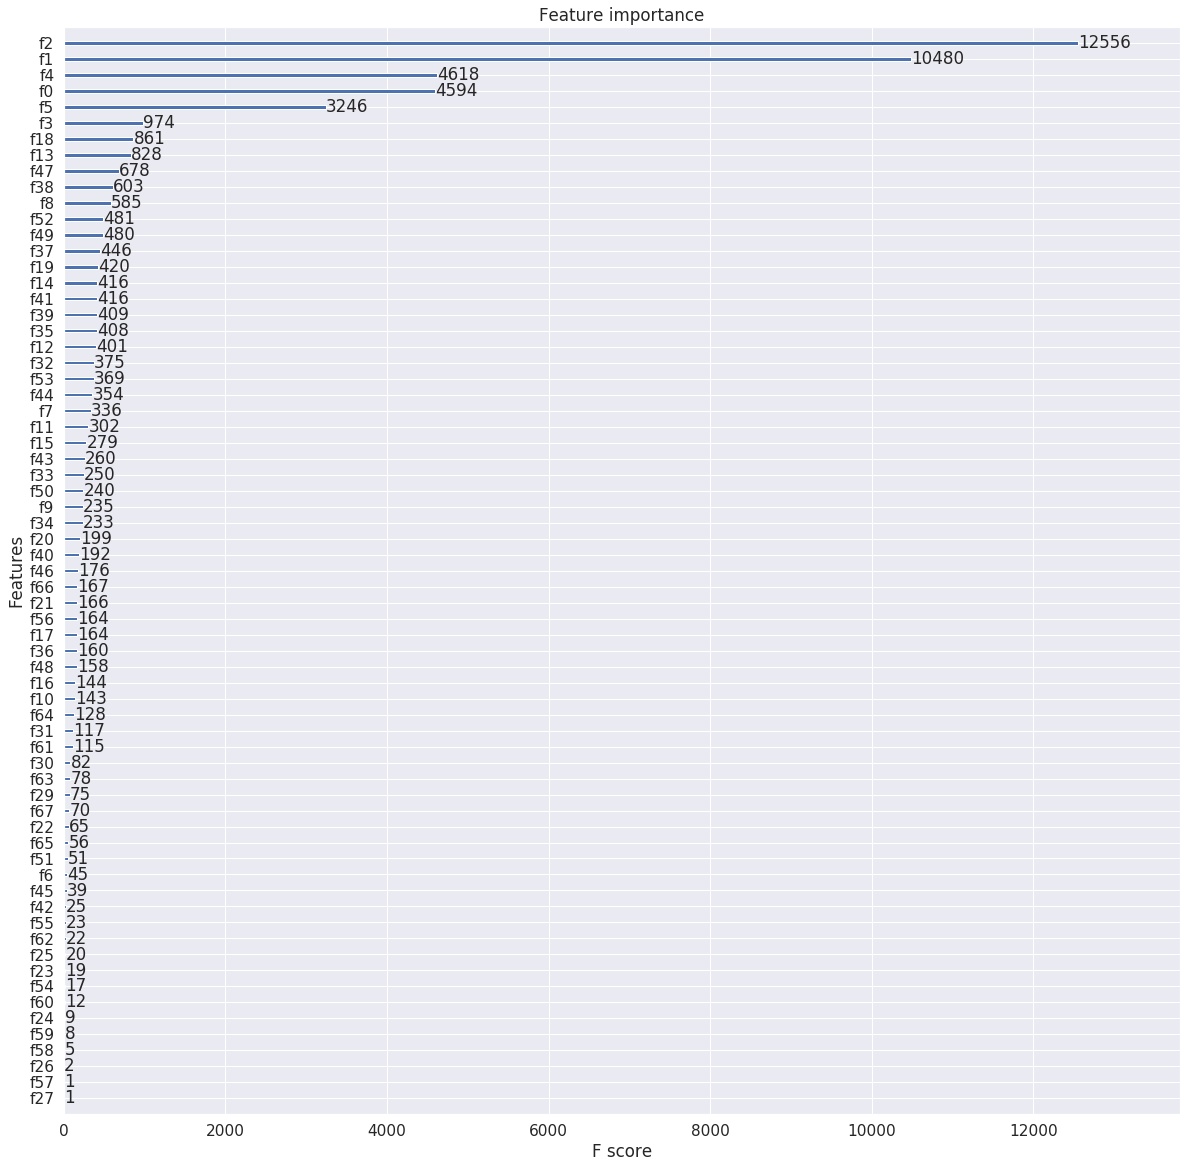

In [25]:
# Plot feature importance

from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (20, 20)
plot_importance(xgb_bst)
plt.show()

#### Eliminate less important training features

In [67]:
train_features_upd = train_features[:,[2 , 1, 4, 0, 5, 3, 18, 13, 47, 38, 8, 52, 40, 41, 39, 19, 37, 35, 14, 53]]
test_features_upd = test_features[:,[2 , 1, 4, 0, 5, 3, 18, 13, 47, 38, 8, 52, 40, 41, 39, 19, 37, 35, 14, 53]]
print(train_features_upd.shape)
print(train_labels.shape)
print(test_features_upd.shape)



(3500, 20)
(3500,)
(1500, 20)


### Logistic Regression

In [98]:
logistic_model = LogisticRegression(random_state = 5, multi_class = 'ovr', verbose = 1).fit(train_features_upd, train_labels)

[LibLinear]

In [99]:
logistic_prediction = logistic_model.predict(test_features_upd)

With 69 features: 0.5746414938615496
With 20 features:  0.5768080057773651


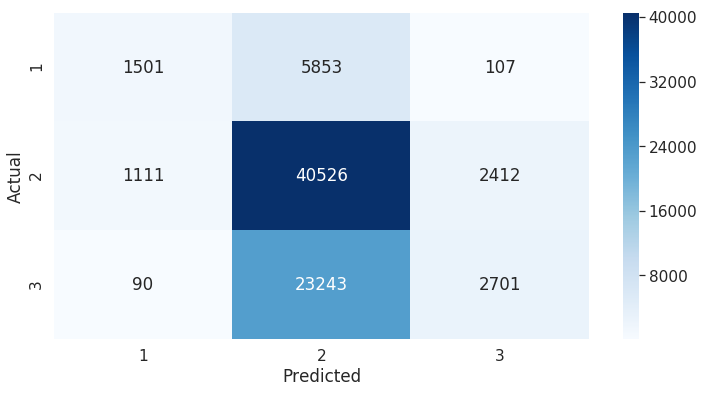

In [100]:
random_cm = confusionMatrix(test_labels, logistic_prediction)
print('With 69 features: 0.5746414938615496')
print('With 20 features: ', f1_score(test_labels, logistic_prediction, average = 'micro'))

### Random Forest

In [68]:
random_forest1 = RandomForestClassifier(n_estimators = 100)
random_forest1.fit(train_features_upd, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
random_prediction1 = random_forest1.predict(test_features_upd)

In [74]:
# random_cm1 = confusionMatrix(test_labels, random_prediction1)
print('With 69 features: 0.7027880945011864')
print ('With 20 features: 0.7009826679046735') 
print('With 20 features & normalized geographic location: ', f1_score(test_labels, random_prediction1, average = 'micro'))
print(train_features_upd.shape)


With 69 features: 0.7027880945011864
With 20 features: 0.7009826679046735
With 20 features & normalized geographic location:  0.6486666666666666
(3500, 20)


### Neuronal Networks

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical



Using TensorFlow backend.


In [83]:
# One hot encode train and test labels

label_encoder = LabelEncoder()
enc_train_labels = label_encoder.fit_transform(train_labels)
onehot_train_labels = to_categorical(enc_train_labels, num_classes=3)

label_encoder = LabelEncoder()
enc_test_labels = label_encoder.fit_transform(test_labels)
onehot_test_labels = to_categorical(enc_test_labels, num_classes=3)




In [90]:
### Define the model

NB_EPOCHS = 1000
BATCH_SIZE = 16

nn_model = Sequential()

# Input layer
nn_model.add(Dense(512, input_shape = (20,)))

# Hidden layer
nn_model.add(Dense(218))

# Hidden layer
nn_model.add(Dense(64))

# Output layer
nn_model.add(Dense(3, activation = 'softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               10752     
_________________________________________________________________
dense_10 (Dense)             (None, 218)               111834    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                14016     
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 195       
Total params: 136,797
Trainable params: 136,797
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Train the model

history = nn_model.fit(train_features_upd,
                       onehot_train_labels,
                       validation_data = (test_features_upd, onehot_test_labels),
                       nb_epoch = NB_EPOCHS,
                       batch_size = BATCH_SIZE,
                       callbacks = callbacks_list,
                       verbose = 0)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':



Epoch 00001: val_acc improved from 0.56805 to 0.56966, saving model to pima-weights.best.hdf5

Epoch 00002: val_acc improved from 0.56966 to 0.57877, saving model to pima-weights.best.hdf5

Epoch 00003: val_acc did not improve from 0.57877

Epoch 00004: val_acc did not improve from 0.57877

Epoch 00005: val_acc did not improve from 0.57877

Epoch 00006: val_acc did not improve from 0.57877

Epoch 00007: val_acc did not improve from 0.57877

Epoch 00008: val_acc did not improve from 0.57877

Epoch 00009: val_acc did not improve from 0.57877

Epoch 00010: val_acc did not improve from 0.57877

Epoch 00011: val_acc did not improve from 0.57877

Epoch 00012: val_acc did not improve from 0.57877

Epoch 00013: val_acc did not improve from 0.57877

Epoch 00014: val_acc did not improve from 0.57877

Epoch 00015: val_acc did not improve from 0.57877

Epoch 00016: val_acc did not improve from 0.57877


KeyboardInterrupt: 

In [97]:
print('With 69 features: 0.56805')
print('With 20 features: 0.56805')
print('With 20 features and normalized geographic locations: 0.57877')

With 69 features: 0.56805
With 20 features: 0.56805
With 20 features and normalized geographic locations: 0.57877


In [115]:
# prediction with neural network
neural_prediction = nn_model.predict_classes(test_features_upd, verbose=0)

0.14209996904982977

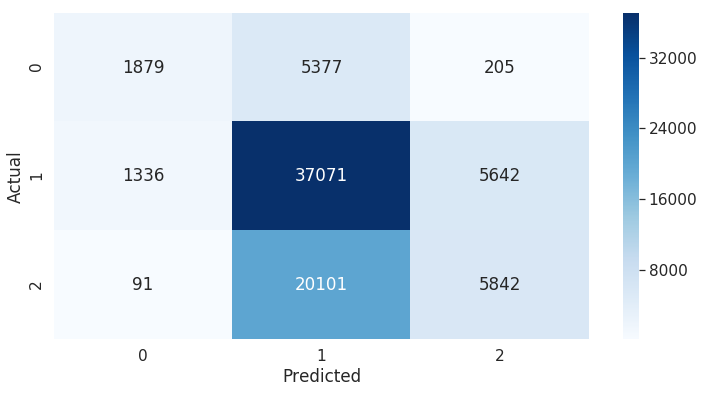

In [121]:
nn_cm = confusionMatrix(enc_test_labels, neural_prediction)
f1_score(test_labels, neural_prediction, average = 'micro')



# Summary

In [123]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Model', 'Type', 'Micro average f1 score']
x.add_row(['1', 'xgboost', '0.74'])
x.add_row(['2', 'logistic regression', '0.57'])
x.add_row(['3', 'random forest', '0.70'])
x.add_row(['4', 'neuronal network', '0.14'])
print(x)

+-------+---------------------+------------------------+
| Model |         Type        | Micro average f1 score |
+-------+---------------------+------------------------+
|   1   |       xgboost       |          0.74          |
|   2   | logistic regression |          0.57          |
|   3   |    random forest    |          0.70          |
|   4   |   neuronal network  |          0.14          |
+-------+---------------------+------------------------+
